In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
import os
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [4]:
# Папка с изображениями (учебная выборка):
folder = 'traffic_lights_images'

In [5]:
# Список вложенных папок с изображениями разных классов:
subfolders = os.listdir(folder)

In [6]:
# Визуализация учебной выборки: по 15 изображений (3 х 5):
nrows = 3
ncols = 5

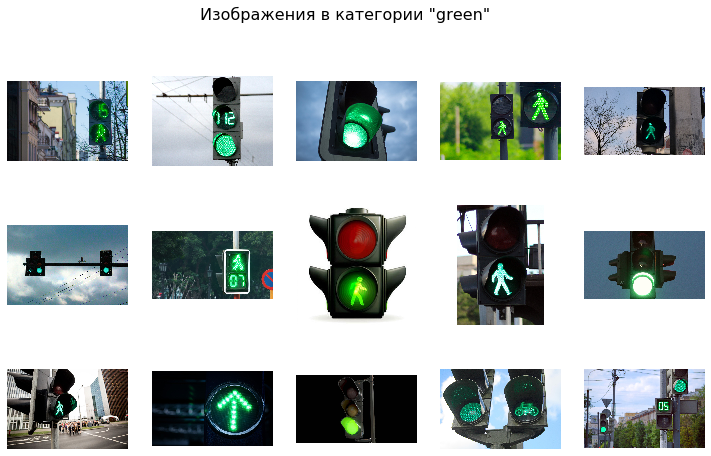

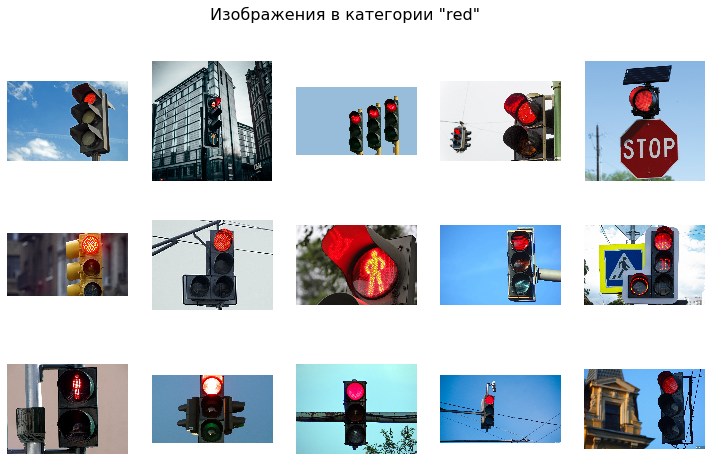

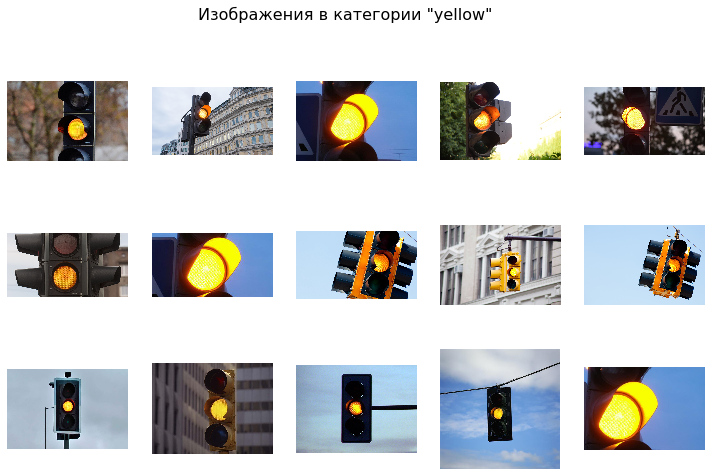

In [7]:
for subfolder in subfolders:
    # Список изображений в каждой вложенной папке:
    images = os.listdir(os.path.join(folder, subfolder))

    # Создаем пустой график для размещения изображений:
    fig = plt.gcf()
    fig.set_size_inches(ncols * 2.5, nrows * 2.5)
    pos = 0  # Переменная определяет позицию следующего изображения

    for image in images:
        # Размещаем изображение на графике:
        pos += 1
        sp = plt.subplot(nrows, ncols, pos)
        # Загружаем рисунок из файла:
        cur_image = mpimg.imread(os.path.join(folder, subfolder, image))
        plt.imshow(cur_image)  # Отображаем рисунок на графике
        plt.axis('Off')  # Не отображаем оси

    # Выводим график с 15 изображениями в одной категории:
    fig.suptitle(f'Изображения в категории "{subfolder}"', fontsize=16)  # Общий заголовок
    plt.show()

In [8]:
# Папка с тестовыми изображениями:
test_folder = 'traffic_lights_images_test'

In [9]:
test_subfolders = os.listdir(test_folder)

In [10]:
# Визуализация тестовой выборки: 9 изображений (3 х 3)
ncols = 3
pos = 0

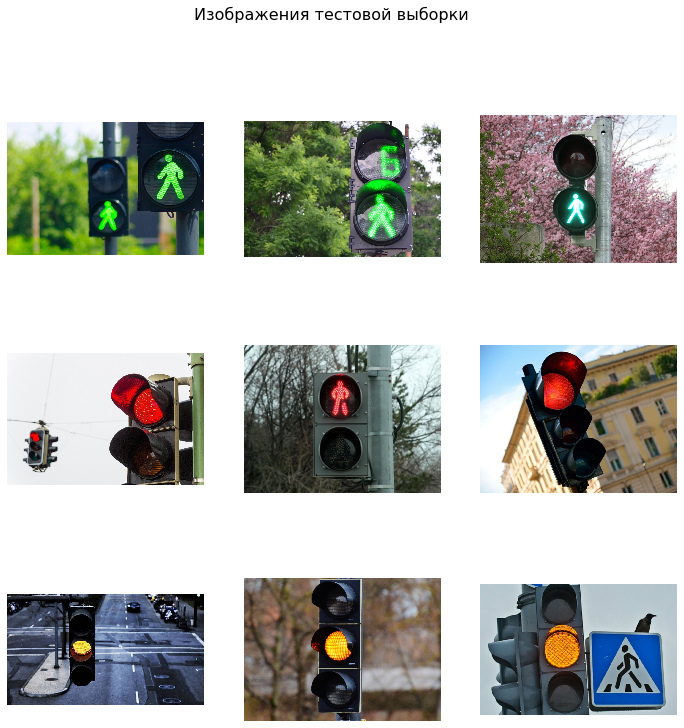

In [12]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

for subfolder in test_subfolders:
    images = os.listdir(os.path.join(test_folder, subfolder))
    for image in images:
        pos += 1
        sp = plt.subplot(nrows, ncols, pos)
        cur_image = mpimg.imread(os.path.join(test_folder, subfolder, image))
        plt.imshow(cur_image)
        plt.axis('Off')

fig.suptitle(f'Изображения тестовой выборки', fontsize=16)
plt.show()

In [13]:
# Создаем генератор учебных изображений:
train_datagen = ImageDataGenerator(rescale=1/255)  # Нормируем изображения делением на 255

In [14]:
train_generator = train_datagen.flow_from_directory(folder,
                                                    target_size=(300, 300),
                                                    class_mode='categorical')

Found 45 images belonging to 3 classes.


In [15]:
# Создаем генератор тестовых изображений:
test_datagen = ImageDataGenerator(rescale=1/255)

In [16]:
test_generator = test_datagen.flow_from_directory(test_folder,
                                                  target_size=(300, 300),
                                                  class_mode='categorical')

Found 9 images belonging to 3 classes.


In [17]:
# Создаем модель (по 3 слоя Convolutions и MaxPooling):
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu',
                           input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [18]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [19]:
# Сведения о модели:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 39200)             0

In [20]:
# Обучаем модель:
history = model.fit(train_generator, epochs=7, verbose=2)

Epoch 1/7
2/2 - 5s - loss: 1.1146 - accuracy: 0.3556
Epoch 2/7
2/2 - 5s - loss: 4.3870 - accuracy: 0.3556
Epoch 3/7
2/2 - 13s - loss: 0.9440 - accuracy: 0.7778
Epoch 4/7
2/2 - 5s - loss: 0.7216 - accuracy: 0.6222
Epoch 5/7
2/2 - 4s - loss: 0.4137 - accuracy: 0.9556
Epoch 6/7
2/2 - 4s - loss: 0.4106 - accuracy: 0.8222
Epoch 7/7
2/2 - 11s - loss: 0.2829 - accuracy: 0.8444


In [21]:
# Оцениваем точность модели:
loss, accuracy = model.evaluate(test_generator, verbose=2)
print(f'Точность модели на тестовой выборке: {accuracy}')

1/1 - 0s - loss: 0.3240 - accuracy: 1.0000
Точность модели на тестовой выборке: 1.0


In [22]:
# Делаем прогноз на тестовой выборке:
prediction = model.predict(test_generator)

In [23]:
# Имена классов в виде списка:
class_names = list(test_generator.class_indices)

In [24]:
# Выводим прогноз в виде наименований классов:
print('Прогноз модели:')
for ind, color in enumerate(prediction):
    # Выбираем из каждого прогноза индекс элемента
    # с наибольшим значением (наиболее вероятный класс):
    print(f'№{ind} - {class_names[np.argmax(color)]}')

Прогноз модели:
№0 - red
№1 - yellow
№2 - green
№3 - green
№4 - red
№5 - yellow
№6 - green
№7 - red
№8 - yellow
